In [65]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timezone
import requests
from io import StringIO
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import tensorflow as tf

In [66]:
# defining stonks and dates. change to user input later
stonk_code = 'AMC'
hist_date = '01-01-2010'
today = dt.today()

In [67]:
# converting dates to Unix timestamps
unix_hist = dt.strptime(hist_date,'%m-%d-%Y').replace(tzinfo=timezone.utc).timestamp()
unix_today = today.replace(tzinfo=timezone.utc).timestamp()

In [68]:
# getting stonk history from Yahoo! Finance
link = (f'https://query1.finance.yahoo.com/v7/finance/download/'
        f'{stonk_code}?period1={int(unix_hist)}&period2={int(unix_today)}&interval=1d&events=history')
b = requests.get(link)
s = str(b.content,'utf-8')
s_io = StringIO(s)
stonks = pd.read_csv(s_io,encoding='utf-8',parse_dates=['Date'])

In [69]:
# defining how far ahead user wants to predict
days_ahead = 30 # change to user input
stonks[f'{days_ahead}_days'] = np.nan
for ind in stonks.index:
    try:
        stonks.loc[ind,f'{days_ahead}_days'] = stonks.loc[ind+days_ahead,'Open']
    except:
        pass

In [70]:
# converting Date column to numeric data
try:
    stonks['Date'] = stonks['Date'].map(dt.toordinal)
except:
    pass

In [71]:
# defining independent & dependent variables, train/test split
x = stonks.dropna().loc[:,['Date','Open','High']]
y = stonks.dropna().loc[:,f'{days_ahead}_days']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

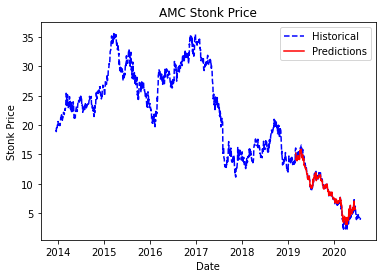

Score: 0.670240194529872


In [72]:
# model & predictions
lm = LinearRegression()
model = lm.fit(x_train,y_train)
test_predictions = lm.predict(x_test)
plt.plot(stonks.Date.map(dt.fromordinal),stonks.Open,'b--',label='Historical')
plt.plot(x_test.Date.map(dt.fromordinal),test_predictions,'r-',label='Predictions')
plt.xlabel('Date')
plt.ylabel('Stonk Price')
plt.title(f'{stonk_code} Stonk Price')
plt.legend(loc=0,frameon=True)
plt.show()
score = model.score(x_test,y_test)
print('Score:',score)

In [73]:
# predicting future stonks
pred_date = '08-18-2020' # change to user input
unix_pred = dt.strptime(pred_date,'%m-%d-%Y').replace(tzinfo=timezone.utc).timestamp()
print(range(int(unix_today),int(unix_pred)))

range(1596242930, 1597708800)


In [74]:
stonks

,Date,Open,High,Low,Close,Adj Close,Volume,30_days
0,735220,19.180000,19.790001,18.900000,18.900000,13.593408,5457200,21.500000
1,735221,18.900000,19.490000,18.809999,19.490000,14.017756,1605400,21.049999
2,735222,19.650000,19.770000,19.400000,19.680000,14.154408,737100,20.840000
3,735225,19.790001,19.990000,19.500000,19.740000,14.197564,698100,20.990000
4,735226,19.740000,19.820000,19.500000,19.530001,14.046525,213700,21.209999
...,...,...,...,...,...,...,...,...
1661,737633,4.010000,4.030000,3.810000,3.870000,3.870000,2980500,NaN
1662,737634,3.850000,4.250000,3.840000,4.150000,4.150000,6226600,NaN
1663,737635,4.070000,4.200000,3.950000,4.160000,4.160000,5489400,NaN
1664,737636,4.120000,4.340000,4.060000,4.120000,4.120000,3694700,NaN


In [81]:
stonks_zscore = (stonks - stonks.mean()) / stonks.std()
stonks_zscore

,Date,Open,High,Low,Close,Adj Close,Volume,30_days
0,-1.732552,-0.148231,-0.113846,-0.139128,-0.178140,-0.427765,1.103688,0.120319
1,-1.731119,-0.180806,-0.148547,-0.149666,-0.109586,-0.356632,-0.020723,0.068437
2,-1.729687,-0.093553,-0.116159,-0.080582,-0.087509,-0.333725,-0.274195,0.044225
3,-1.725389,-0.077265,-0.090712,-0.068873,-0.080538,-0.326491,-0.285580,0.061519
4,-1.723956,-0.083082,-0.110376,-0.068873,-0.104938,-0.351810,-0.426985,0.086884
...,...,...,...,...,...,...,...,...
1661,1.724302,-1.913073,-1.936826,-1.906041,-1.924517,-2.057697,0.380694,NaN
1662,1.725734,-1.931687,-1.911379,-1.902528,-1.891983,-2.010760,1.328290,NaN
1663,1.727167,-1.906092,-1.917162,-1.889648,-1.890822,-2.009084,1.113088,NaN
1664,1.728600,-1.900276,-1.900968,-1.876768,-1.895469,-2.015789,0.589182,NaN


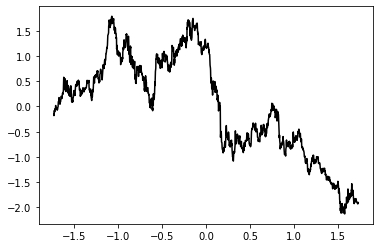

In [83]:
plt.plot(stonks_zscore.Date,stonks_zscore.Open,'k-')
plt.show()